# Linear Regression

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('../data/weight-height.csv')

In [ ]:
df.head()

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [ ]:
def line(x, w=0, b=0):
    return x * w + b

In [ ]:
x = np.linspace(55, 80, 100)

In [ ]:
x

In [ ]:
yhat = line(x, w=0, b=0)

In [ ]:
yhat

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [ ]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [ ]:
X = df[['Height']].values
y_true = df['Weight'].values

In [ ]:
y_true

In [ ]:
y_pred = line(X)

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_true, y_pred.ravel())

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [ ]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [ ]:
model.fit(X, y_true, epochs=40)

In [ ]:
y_pred = model.predict(X)

In [ ]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

## Evaluating Model Performance

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [ ]:
len(X_train)

In [ ]:
len(X_test)

In [ ]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [ ]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [ ]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

In [ ]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

# Classification

In [77]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [78]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


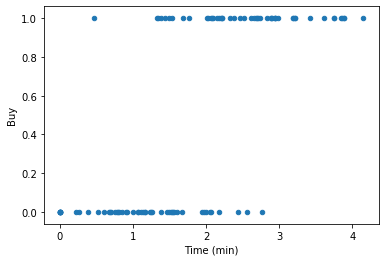

In [79]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [80]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [81]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [83]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 1s 6ms/step - loss: 0.6391 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 274us/step - loss: 0.5809 - acc: 0.7400
Epoch 3/25
100/100 [==============================] - 0s 404us/step - loss: 0.5449 - acc: 0.7100
Epoch 4/25
100/100 [==============================] - 0s 195us/step - loss: 0.5349 - acc: 0.7300
Epoch 5/25
100/100 [==============================] - 0s 162us/step - loss: 0.5210 - acc: 0.8200
Epoch 6/25
100/100 [==============================] - 0s 214us/step - loss: 0.5082 - acc: 0.7700
Epoch 7/25
100/100 [==============================] - 0s 144us/step - loss: 0.4814 - acc: 0.7900
Epoch 8/25
100/100 [==============================] - 0s 162us/step - loss: 0.5317 - acc: 0.7400
Epoch 9/25
100/100 [==============================] - 0s 165us/step - loss: 0.4561 - acc: 0.8300
Epoch 10/25
100/100 [==============================] - 0s 334us/step - loss: 0.4629 - acc: 0.7900
Epoch 11/25
100/100 [==========

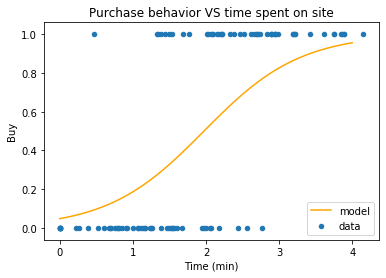

In [84]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [85]:
temp_class = model.predict(temp) > 0.5

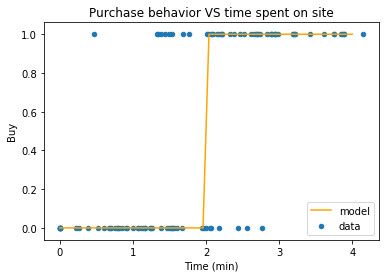

In [86]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [ ]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

### Train/Test split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [ ]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [ ]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

## Cross Validation

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
cv = KFold(3, shuffle=True)

In [ ]:
scores = cross_val_score(model, X, y, cv=cv)

In [ ]:
scores

In [ ]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y, y_class_pred)

In [ ]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [ ]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y, y_class_pred))

## Feature Preprocessing

### Categorical Features

In [ ]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

In [ ]:
df['Gender'].unique()

In [ ]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

## Feature Transformations

#### 1) Rescale with fixed factor

In [ ]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [ ]:
df.describe().round(2)

#### MinMax normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

#### 3) Standard normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

In [ ]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [3]:
import pandas as pd
import seaborn as sns

housing_data = pd.read_csv('../data/housing-data.csv')
housing_data.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


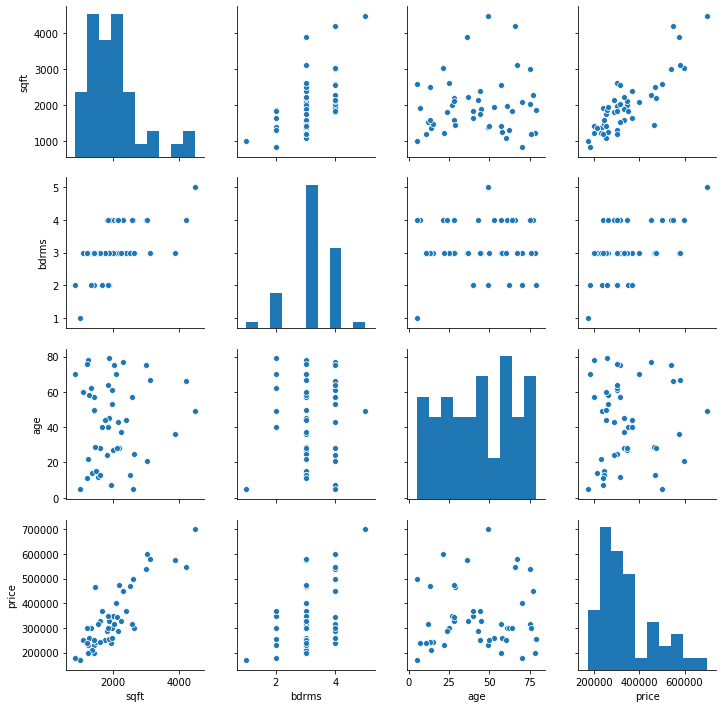

In [4]:
sns.pairplot(housing_data)

In [5]:
from sklearn.model_selection import train_test_split

label_column = 'price'
X = housing_data.loc[:, housing_data.columns != label_column]
y = housing_data.loc[:, label_column]
# X.describe()
# y.describe()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    shuffle=True)



In [6]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(1, 
                input_shape=(3,),
                activation='linear', 
               )
         )

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(optimizer=Adam(lr=0.8), loss='mean_squared_error')
# model.compile(optimizer=SGD(), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
37/37 [==============================] - 0s 9ms/step - loss: 116123372903.7838
Epoch 2/100
37/37 [==============================] - 0s 164us/step - loss: 114330767027.8919
Epoch 3/100
37/37 [==============================] - 0s 109us/step - loss: 112301010611.8919
Epoch 4/100
37/37 [==============================] - 0s 185us/step - loss: 110120722210.5946
Epoch 5/100
37/37 [==============================] - 0s 239us/step - loss: 108017580751.5676
Epoch 6/100
37/37 [==============================] - 0s 111us/step - loss: 105705842189.8378
Epoch 7/100
37/37 [==============================] - 0s 121us/step - loss: 103693862413.8378
Epoch 8/100
37/37 [==============================] - 0s 260us/step - loss: 101503531727.5676
Epoch 9/100
37/37 [==============================] - 0s 105us/step - loss: 99306173855.1351
Epoch 10/100
37/37 [==============================] - 0s 86us/step - loss: 97368673529.0811
Epoch 11/100
37/37 [======

37/37 [==============================] - 0s 146us/step - loss: 15819583764.7568
Epoch 87/100
37/37 [==============================] - 0s 128us/step - loss: 15414331904.0000
Epoch 88/100
37/37 [==============================] - 0s 122us/step - loss: 15022641733.1892
Epoch 89/100
37/37 [==============================] - 0s 164us/step - loss: 14652761392.4324
Epoch 90/100
37/37 [==============================] - 0s 100us/step - loss: 14315870872.2162
Epoch 91/100
37/37 [==============================] - 0s 118us/step - loss: 13965470304.8649
Epoch 92/100
37/37 [==============================] - 0s 163us/step - loss: 13642137600.0000
Epoch 93/100
37/37 [==============================] - 0s 150us/step - loss: 13327322665.5135
Epoch 94/100
37/37 [==============================] - 0s 211us/step - loss: 13001247577.9459
Epoch 95/100
37/37 [==============================] - 0s 263us/step - loss: 12684127425.7297
Epoch 96/100
37/37 [==============================] - 0s 168us/step - loss: 1238736

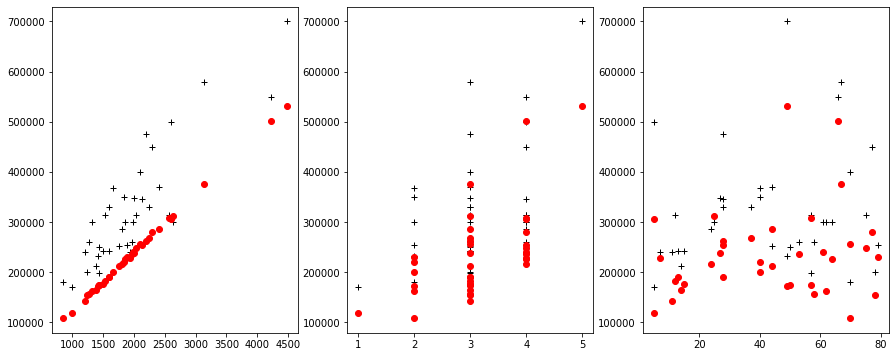

In [8]:
y_predict_train = model.predict(X_train)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,6))
axs = axs.ravel()                        

for i, col in enumerate(X.columns):
    axs[i].plot(X_train[col], y_train, 'k+', )
    axs[i].plot(X_train[col], y_predict_train, 'ro', )

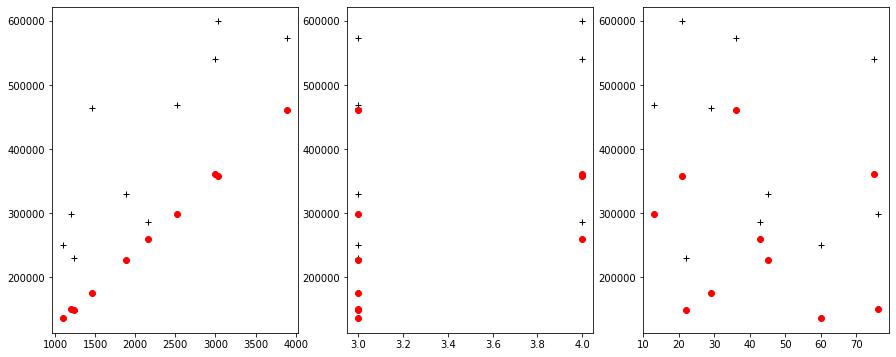

In [9]:
y_predict_test = model.predict(X_test)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,6))
axs = axs.ravel()                        

for i, col in enumerate(X.columns):
    axs[i].plot(X_test[col], y_test, 'k+', )
    axs[i].plot(X_test[col], y_predict_test, 'ro', )

In [10]:
from sklearn.metrics import mean_squared_error, r2_score
mse_train = mean_squared_error(y_train, y_predict_train)
mse_test = mean_squared_error(y_test, y_predict_test)
print(f"MSE train = {mse_train}")
print(f"MSE test  = {mse_test}")

r2_train = r2_score(y_train, y_predict_train)
r2_test = r2_score(y_test, y_predict_test)
print(f"R2 train = {r2_train}")
print(f"R2 test = {r2_test}")


MSE train = 11016102886.769617
MSE test  = 26902884104.79995
R2 train = 0.16819797310432105
R2 test = -0.5157203629969163


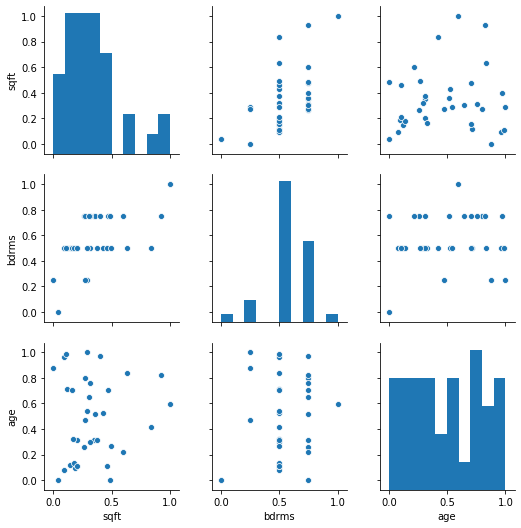

In [11]:
from sklearn.preprocessing import MinMaxScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,  
                                                    shuffle=True)


scaler = MinMaxScaler()
scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(scaled, columns=X_train.columns)

scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(scaled, columns=X_test.columns)

sns.pairplot(X_train_scaled)


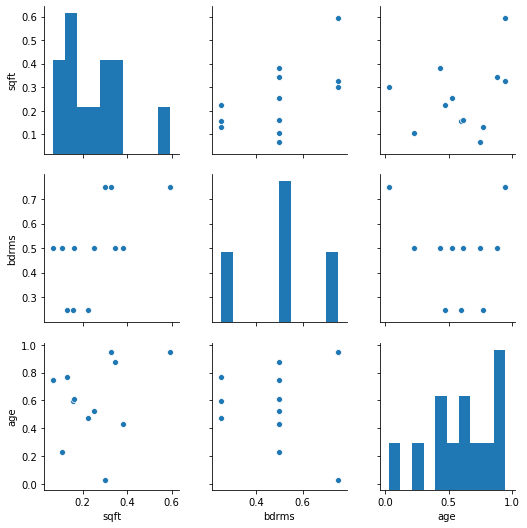

In [12]:
sns.pairplot(X_test_scaled)

In [13]:
model_scaled = Sequential()
model_scaled.add(Dense(1, 
                input_shape=(3,),
#                 activation='linear', 
               )
         )
model_scaled.compile(optimizer=Adam(lr=10000), loss='mean_squared_error')
# model_scaled.compile(optimizer=SGD(), loss='mean_squared_error')
model_scaled.fit(X_train_scaled, y_train, epochs=500, verbose=1)

Epoch 1/500
35/35 [==============================] - 0s 8ms/step - loss: 139939810274.7429
Epoch 2/500
35/35 [==============================] - 0s 148us/step - loss: 113678284741.4857
Epoch 3/500
35/35 [==============================] - 0s 126us/step - loss: 87640609587.2000
Epoch 4/500
35/35 [==============================] - 0s 257us/step - loss: 64730819086.6286
Epoch 5/500
35/35 [==============================] - 0s 108us/step - loss: 46404273064.2286
Epoch 6/500
35/35 [==============================] - 0s 193us/step - loss: 32392535075.6571
Epoch 7/500
35/35 [==============================] - 0s 110us/step - loss: 22069962517.9429
Epoch 8/500
35/35 [==============================] - 0s 176us/step - loss: 16320019931.4286
Epoch 9/500
35/35 [==============================] - 0s 147us/step - loss: 13066748050.2857
Epoch 10/500
35/35 [==============================] - 0s 197us/step - loss: 11927806464.0000
Epoch 11/500
35/35 [==============================] - 0s 130us/step - loss: 118

Epoch 90/500
35/35 [==============================] - 0s 173us/step - loss: 4911532620.8000
Epoch 91/500
35/35 [==============================] - 0s 200us/step - loss: 4877300957.2571
Epoch 92/500
35/35 [==============================] - 0s 140us/step - loss: 4870192552.2286
Epoch 93/500
35/35 [==============================] - 0s 131us/step - loss: 4964504956.3429
Epoch 94/500
35/35 [==============================] - 0s 204us/step - loss: 5086959674.5143
Epoch 95/500
35/35 [==============================] - 0s 294us/step - loss: 5186066636.8000
Epoch 96/500
35/35 [==============================] - 0s 171us/step - loss: 5175279813.4857
Epoch 97/500
35/35 [==============================] - 0s 240us/step - loss: 5083431021.7143
Epoch 98/500
35/35 [==============================] - 0s 168us/step - loss: 4997274258.2857
Epoch 99/500
35/35 [==============================] - 0s 142us/step - loss: 4947516767.0857
Epoch 100/500
35/35 [==============================] - 0s 174us/step - loss: 494

35/35 [==============================] - 0s 103us/step - loss: 4770830277.4857
Epoch 179/500
35/35 [==============================] - 0s 177us/step - loss: 4560489504.9143
Epoch 180/500
35/35 [==============================] - 0s 132us/step - loss: 4610000596.1143
Epoch 181/500
35/35 [==============================] - 0s 141us/step - loss: 4645423250.2857
Epoch 182/500
35/35 [==============================] - 0s 99us/step - loss: 4715173302.8571
Epoch 183/500
35/35 [==============================] - 0s 241us/step - loss: 4890433850.5143
Epoch 184/500
35/35 [==============================] - 0s 125us/step - loss: 4866885946.5143
Epoch 185/500
35/35 [==============================] - 0s 169us/step - loss: 4766466750.1714
Epoch 186/500
35/35 [==============================] - 0s 120us/step - loss: 4598006198.8571
Epoch 187/500
35/35 [==============================] - 0s 139us/step - loss: 4588417316.5714
Epoch 188/500
35/35 [==============================] - 0s 149us/step - loss: 45666549

35/35 [==============================] - 0s 159us/step - loss: 5085552457.1429
Epoch 267/500
35/35 [==============================] - 0s 130us/step - loss: 5018724352.0000
Epoch 268/500
35/35 [==============================] - 0s 146us/step - loss: 4816356666.5143
Epoch 269/500
35/35 [==============================] - 0s 163us/step - loss: 4553906358.8571
Epoch 270/500
35/35 [==============================] - 0s 110us/step - loss: 4587214804.1143
Epoch 271/500
35/35 [==============================] - 0s 121us/step - loss: 4782853310.1714
Epoch 272/500
35/35 [==============================] - 0s 146us/step - loss: 4959932202.0571
Epoch 273/500
35/35 [==============================] - 0s 109us/step - loss: 5001508093.4857
Epoch 274/500
35/35 [==============================] - 0s 92us/step - loss: 4934094213.4857
Epoch 275/500
35/35 [==============================] - 0s 176us/step - loss: 4846623765.9429
Epoch 276/500
35/35 [==============================] - 0s 116us/step - loss: 47944567

35/35 [==============================] - 0s 129us/step - loss: 4715992078.6286
Epoch 355/500
35/35 [==============================] - 0s 147us/step - loss: 4764119690.9714
Epoch 356/500
35/35 [==============================] - 0s 126us/step - loss: 4729543533.7143
Epoch 357/500
35/35 [==============================] - 0s 154us/step - loss: 4618793150.1714
Epoch 358/500
35/35 [==============================] - 0s 126us/step - loss: 4520706391.7714
Epoch 359/500
35/35 [==============================] - 0s 154us/step - loss: 4610628388.5714
Epoch 360/500
35/35 [==============================] - 0s 122us/step - loss: 4794851722.9714
Epoch 361/500
35/35 [==============================] - 0s 173us/step - loss: 4833306770.2857
Epoch 362/500
35/35 [==============================] - 0s 144us/step - loss: 4712379626.0571
Epoch 363/500
35/35 [==============================] - 0s 134us/step - loss: 4604438528.9143
Epoch 364/500
35/35 [==============================] - 0s 112us/step - loss: 4519346

Epoch 442/500
35/35 [==============================] - 0s 270us/step - loss: 4448194325.9429
Epoch 443/500
35/35 [==============================] - 0s 93us/step - loss: 4963828831.0857
Epoch 444/500
35/35 [==============================] - 0s 120us/step - loss: 5509331324.3429
Epoch 445/500
35/35 [==============================] - 0s 215us/step - loss: 5879397939.2000
Epoch 446/500
35/35 [==============================] - 0s 113us/step - loss: 5869689468.3429
Epoch 447/500
35/35 [==============================] - 0s 143us/step - loss: 5389282033.3714
Epoch 448/500
35/35 [==============================] - 0s 187us/step - loss: 4806779611.4286
Epoch 449/500
35/35 [==============================] - 0s 140us/step - loss: 4576092437.9429
Epoch 450/500
35/35 [==============================] - 0s 160us/step - loss: 4747007605.0286
Epoch 451/500
35/35 [==============================] - 0s 219us/step - loss: 5022953691.4286
Epoch 452/500
35/35 [==============================] - 0s 151us/step - 

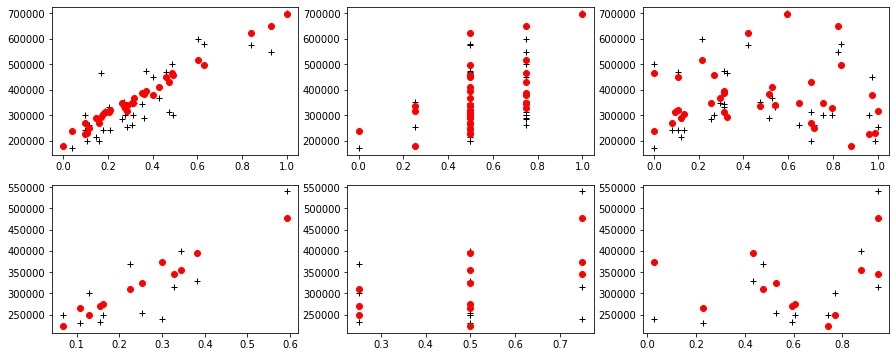

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(15,6))

y_predict_train_scaled = model_scaled.predict(X_train_scaled)

for i, col in enumerate(X.columns):
    axs[0, i].plot(X_train_scaled[col], y_train, 'k+', )
    axs[0, i].plot(X_train_scaled[col], y_predict_train_scaled, 'ro', )

y_predict_test_scaled = model_scaled.predict(X_test_scaled)
                
for i, col in enumerate(X.columns):
    axs[1, i].plot(X_test_scaled[col], y_test, 'k+', )
    axs[1, i].plot(X_test_scaled[col], y_predict_test_scaled, 'ro', )

In [15]:
mse_train = mean_squared_error(y_train, y_predict_train_scaled)
mse_test = mean_squared_error(y_test, y_predict_test_scaled)
print(f"MSE train = {mse_train}")
print(f"MSE test = {mse_test}")

r2_train = r2_score(y_train, y_predict_train_scaled)
r2_test = r2_score(y_test, y_predict_test_scaled)
print(f"R2 train = {r2_train}")
print(f"R2 test = {r2_test}")


MSE train = 4898632042.214048
MSE test = 3678659568.9674478
R2 train = 0.7191713333244434
R2 test = 0.5240654208879669


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. They would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
hr_data = pd.read_csv('../data/HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


/home/lollo/miniconda3/envs/ztdl/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/lollo/miniconda3/envs/ztdl/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


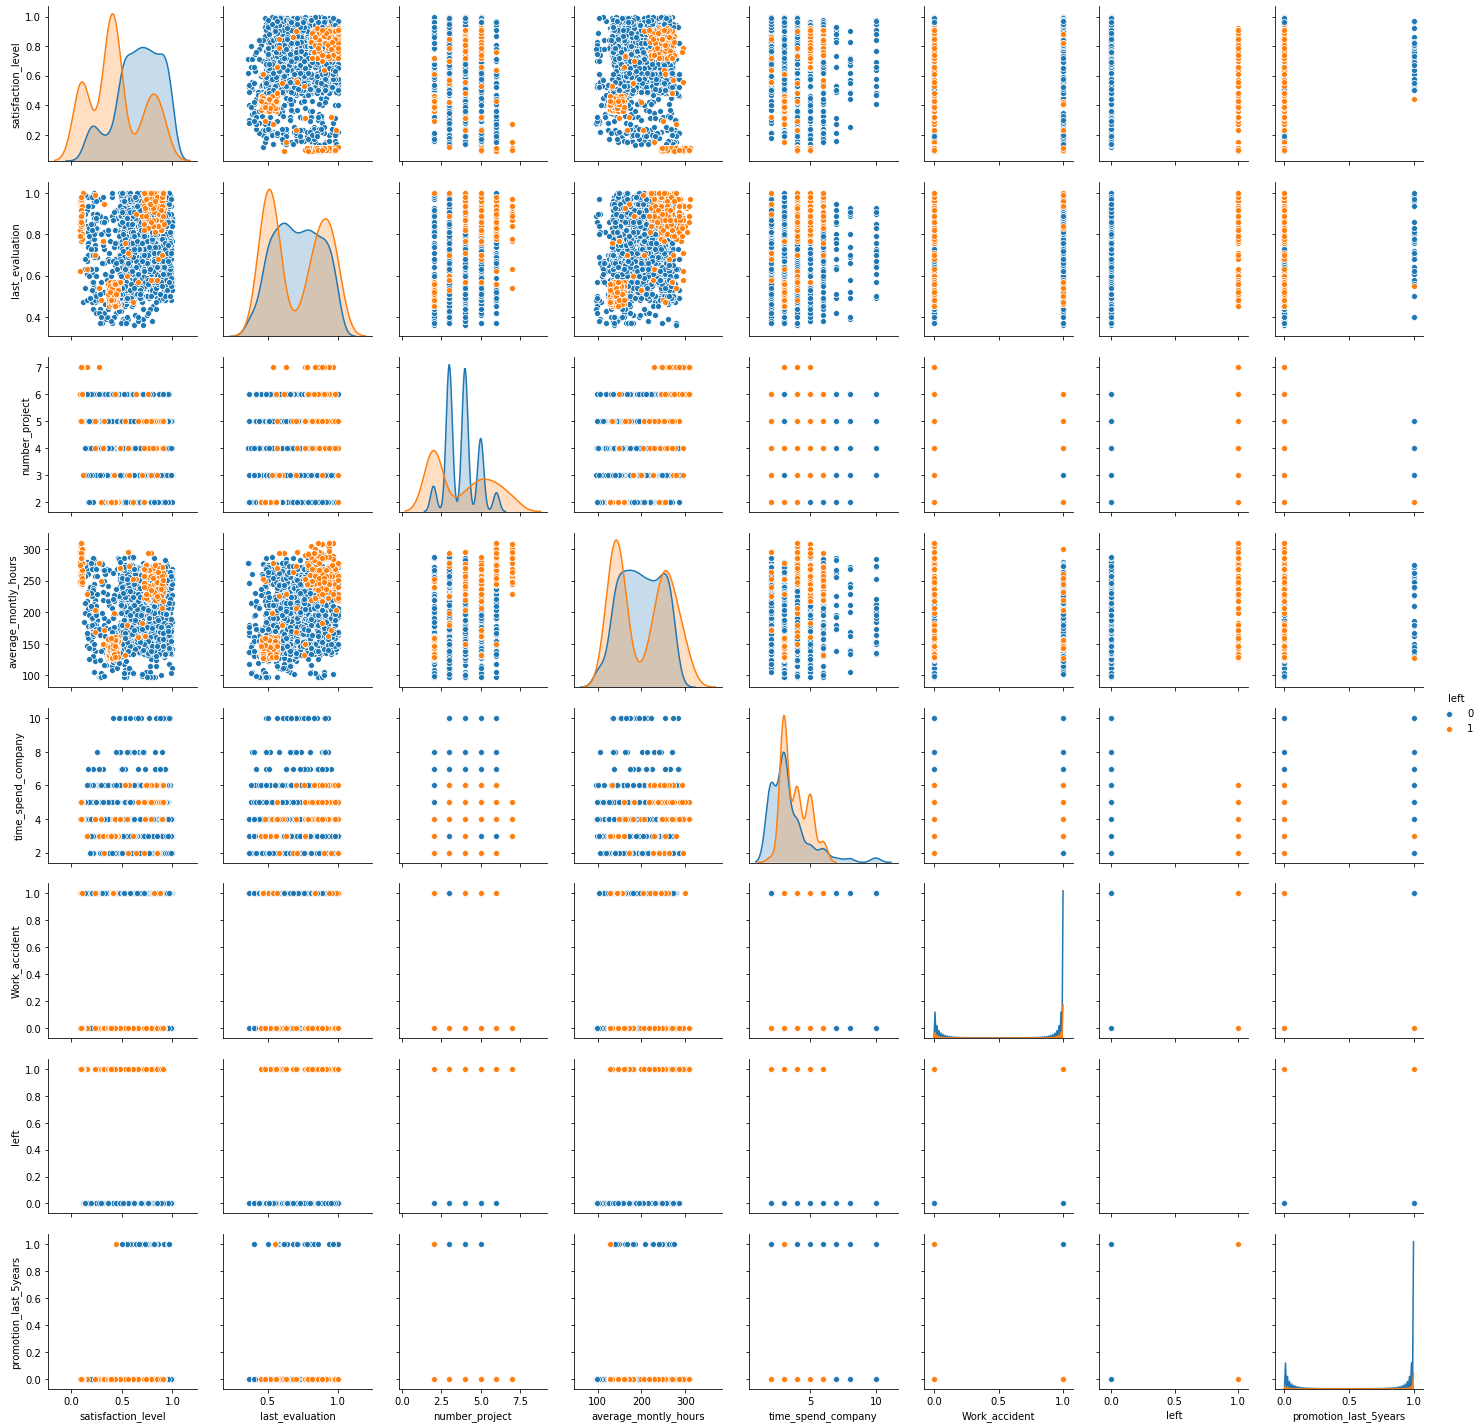

In [19]:
# hr_data.sample(frac=0.1).describe()
sns.pairplot(hr_data.sample(frac=0.1), hue='left')

- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?

In [48]:
from sklearn.model_selection import train_test_split

labels_column = 'left'
X = hr_data.loc[:, hr_data.columns != labels_column]
y = hr_data.loc[:, hr_data.columns == labels_column]

In [49]:
from sklearn.metrics import r2_score
benchmark_r2_score = r2_score(
    y, 
#     pd.Series([y.mean().mean()]).repeat(y.size),
    pd.Series(0).repeat(y.size),
)
print(f'R2 score for a benchmark model would be: {benchmark_r2_score}')

R2 score for a benchmark model would be: -0.31247812390619534


## Data prep

- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.

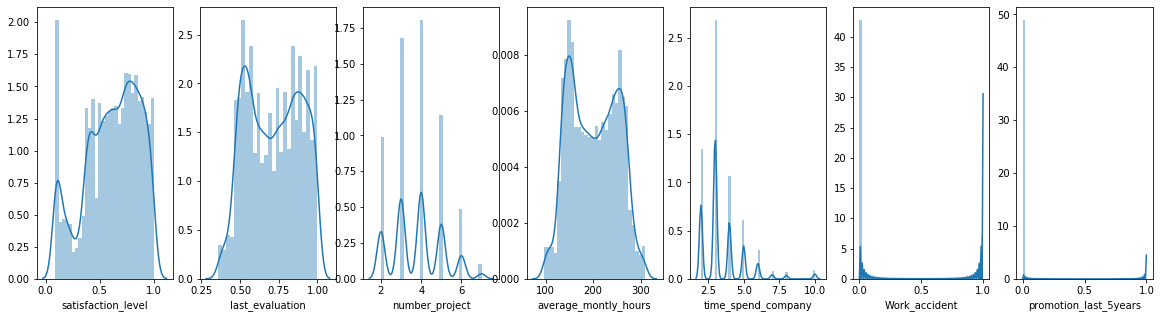

In [50]:
bool_columns = ['promotion_last_5years', 'Work_accident']
cat_columns = ['sales', 'salary']
X_continuous = X.drop(cat_columns, axis=1)
fig, axs = plt.subplots(1, len(X_continuous.columns), figsize=(20,5))
for i, ax in enumerate(axs): 
#     pass
    sns.distplot(X_continuous.iloc[:, i], ax=ax)


In [47]:
X_continuous.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0


- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size

In [51]:
X_dummies = X.copy()
for cat_column in cat_columns:
    X_dummies = pd.concat(
        [
            X_dummies.drop(cat_column, axis=1),
            pd.get_dummies(X_dummies[cat_column])
        ],
        axis=1,
    )


In [53]:
X_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y, 
                                                    test_size=0.2,
                                                    random_state=42)

- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?


In [59]:
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

model = Sequential()
model.add(Dense(1, 
                input_shape=(X_train.shape[1],),
                activation='sigmoid', 
               )
         )

In [60]:
model.compile(optimizer=SGD(lr=0.5), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer=SGD(), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
11999/11999 [==============================] - 2s 140us/step - loss: 3.8485 - acc: 0.7612
Epoch 2/100
11999/11999 [==============================] - 1s 89us/step - loss: 3.8485 - acc: 0.7612
Epoch 3/100
11999/11999 [==============================] - 1s 104us/step - loss: 3.8485 - acc: 0.7612
Epoch 4/100
11999/11999 [==============================] - 1s 94us/step - loss: 3.8485 - acc: 0.7612
Epoch 5/100
11999/11999 [==============================] - 1s 102us/step - loss: 3.8485 - acc: 0.7612
Epoch 6/100
11999/11999 [==============================] - 1s 88us/step - loss: 3.8485 - acc: 0.7612
Epoch 7/100
11999/11999 [==============================] - 1s 86us/step - loss: 3.8485 - acc: 0.7612
Epoch 8/100
11999/11999 [==============================] - 1s 114us/step - loss: 3.8485 - acc: 0.7612
Epoch 9/100
11999/11999 [==============================] - 1s 88us/step - loss: 3.8485 - acc: 0.7612
Epoch 10/100
11999/11999 [==============================] - 1s 118us/step - loss: 3.848

Epoch 81/100
11999/11999 [==============================] - 1s 104us/step - loss: 3.8485 - acc: 0.7612
Epoch 82/100
11999/11999 [==============================] - 2s 126us/step - loss: 3.8485 - acc: 0.7612
Epoch 83/100
11999/11999 [==============================] - 1s 99us/step - loss: 3.8485 - acc: 0.7612
Epoch 84/100
11999/11999 [==============================] - 1s 101us/step - loss: 3.8485 - acc: 0.7612
Epoch 85/100
11999/11999 [==============================] - 1s 107us/step - loss: 3.8485 - acc: 0.7612
Epoch 86/100
11999/11999 [==============================] - 1s 92us/step - loss: 3.8485 - acc: 0.7612
Epoch 87/100
11999/11999 [==============================] - 1s 96us/step - loss: 3.8485 - acc: 0.7612
Epoch 88/100
11999/11999 [==============================] - 1s 98us/step - loss: 3.8485 - acc: 0.7612
Epoch 89/100
11999/11999 [==============================] - 1s 90us/step - loss: 3.8485 - acc: 0.7612
Epoch 90/100
11999/11999 [==============================] - 1s 104us/step - lo

In [61]:
y_pred = model.predict(X_test)
y_class_pred = y_pred > 0.5

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

confusion_matrix(y_test, y_class_pred)
pretty_confusion_matrix(y_test, y_class_pred, ['stayed', 'left'])


,Predicted stayed,Predicted left
stayed,2294,0
left,706,0


In [69]:
np.unique(y_pred)

array([0.0000000e+00, 2.9802322e-08, 1.1920929e-07], dtype=float32)

In [70]:

print("Precision:\t{:0.3f}".format(precision_score(y_test, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y_test, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y_test, y_class_pred)))
print(classification_report(y_test, y_class_pred))

Precision:	0.000
Recall:  	0.000
F1 Score:	0.000
              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



/home/lollo/miniconda3/envs/ztdl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lollo/miniconda3/envs/ztdl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/lollo/miniconda3/envs/ztdl/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Prova cambiando parametri

In [71]:
model.compile(
    optimizer=SGD(lr=10), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
11999/11999 [==============================] - 2s 128us/step - loss: 3.8485 - acc: 0.7612
Epoch 2/50
11999/11999 [==============================] - 1s 89us/step - loss: 3.8485 - acc: 0.7612
Epoch 3/50
11999/11999 [==============================] - 1s 96us/step - loss: 3.8485 - acc: 0.7612
Epoch 4/50
11999/11999 [==============================] - 1s 80us/step - loss: 3.8485 - acc: 0.7612
Epoch 5/50
11999/11999 [==============================] - 1s 89us/step - loss: 3.8485 - acc: 0.7612
Epoch 6/50
11999/11999 [==============================] - 1s 98us/step - loss: 3.8485 - acc: 0.7612
Epoch 7/50
11999/11999 [==============================] - 1s 101us/step - loss: 3.8485 - acc: 0.7612
Epoch 8/50
11999/11999 [==============================] - 1s 116us/step - loss: 3.8485 - acc: 0.7612
Epoch 9/50
11999/11999 [==============================] - 1s 93us/step - loss: 3.8485 - acc: 0.7612
Epoch 10/50
11999/11999 [==============================] - 1s 100us/step - loss: 3.8485 - acc: 0.

In [73]:
y_pred = model.predict(X_test)
y_class_pred = y_pred > 0.5

confusion_matrix(y_test, y_class_pred)

array([[2294,    0],
       [ 706,    0]])

In [74]:
print(classification_report(y_test, y_class_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2294
           1       0.00      0.00      0.00       706

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000

